<a href="https://colab.research.google.com/github/Abhiram-108/CSE-LAB-303/blob/main/HighCorelationFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


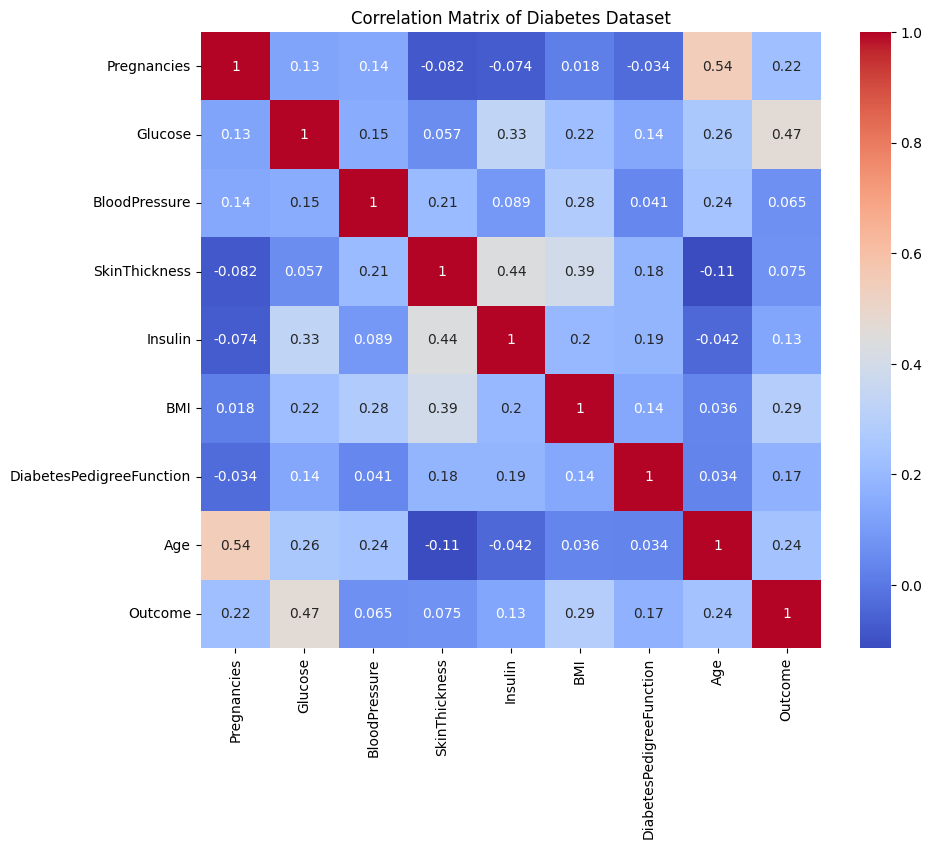

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Display heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

# Find pairs of features with correlation > 0.8



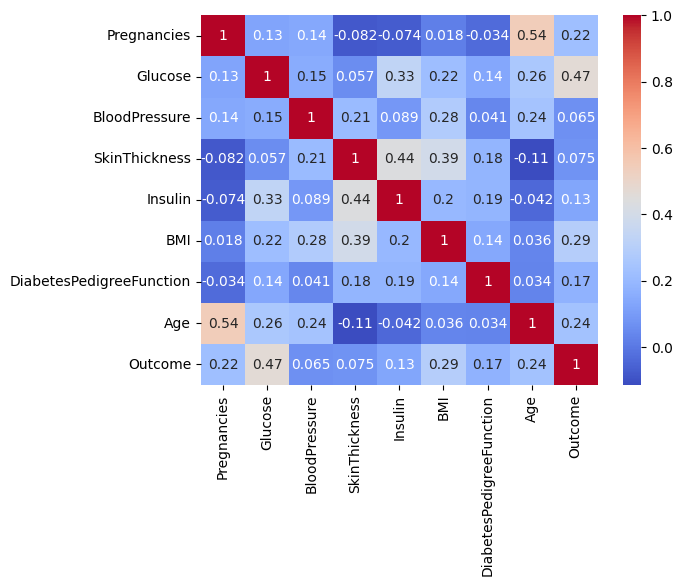

In [ ]:
correlations = df.corr()

# Find pairs of highly correlated features
correlated_pairs = correlations[(correlations > 0.8) & (correlations < 1)]

# Visualize the correlation matrix (optional)
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
correlations = df.corr()

# Find pairs of highly correlated features
correlated_pairs = correlations[(correlations > 0.8) & (correlations < 1)]

# Select one feature from each pair to remove
features_to_remove = set(correlated_pairs.index)

# Remove correlated features
# df = df.drop(features_to_remove, axis=1)

# Split the data into features and target variable
X=df.drop('Outcome',axis=1)
y=df['Outcome']

# Standardize features (optional but recommended for better model performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()

model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1-score: 0.6607142857142857
